Before you begin, execute this cell to import numpy and packages from the D-Wave Ocean suite, and all necessary functions the gate-model framework you are going to use, whether that is the Forest SDK or Qiskit. In the case of Forest SDK, it also starts the qvm and quilc servers.

In [1]:
%run -i "assignment_helper.py"

Available frameworks:
Forest SDK
Qiskit
D-Wave Ocean


# Quantum Fourier Transform

**Exercise 1** (3 points). The quantum Fourier transform acts on an amplitude-encoded variant of a normalized vector, the quantum state $|x\rangle=\sum_{i=0}^{N-1} x_i |i \rangle$. It maps this state to $|y\rangle=\sum_{k=0}^{N-1} y_k |k \rangle$, where $y_k = \frac{1}{\sqrt{N}}\sum_{j=0}^{N-1}x_je^{\boldsymbol{2\pi i} \frac{jk}{N}}$. If you have a two-dimensional vector to transform, you only need a single qubit, and the transformation reduces to $U |x \rangle = \frac{1}{\sqrt{2}} \left(|0\rangle + e^{\boldsymbol{2\pi i} 0.x_1} |1\rangle\right)$. Implement this circuit. Place your solution in an object called `qft`. 

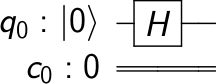

In [2]:
from qiskit.tools.visualization import circuit_drawer
π = np.pi
###
q = QuantumRegister(1, 'q')
c = ClassicalRegister(1, 'c')
qft = QuantumCircuit(q, c)
qft.h(q)
#qft.cu1(π/2, q[1], q[0])
###

circuit_drawer(qft)


In [3]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


**Exercise 2** (1 point). Implement the inverse quantum Fourier transformation on a single qubit. Place your solution in an object called `iqft`. 

In [4]:
###
iqft = QuantumCircuit(q, c)

#iqft.swap(q[0], q[1])
iqft.h(q)
#iqft.cu1(π / 2, q[0], q[1])
#iqft.h(q[0])
#iqft.swap(q[0], q[1])
###


In [5]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


# Quantum phase estimation

**Exercise 3** (3 points). Phase estimation pivots on the controlled application of powers of a unitary matrix, followed by an inverse Fourier transformation. Take the $2\times 2$ unitary matrix $\begin{bmatrix}1 & 0 \\0 & i\end{bmatrix}$. This operation has two eigenvectors, $|0\rangle$ and $|1\rangle$. Implement the first part of the quantum phase estimation with two ancilla qubits: add the necessary Hadamard gates on the ancilla qubits and apply $C-U^{2^0}$ and $C-U^{2^1}$. Qubits 0 and 1 should be the ancilla, and qubit 2 contains the eigenvector -- you can assume that this is $|0\rangle$. Place your solution in an object called `circuit`. 

[0.5+0.j 0.5+0.j 0.5+0.j 0.5+0.j 0. +0.j 0. +0.j 0. +0.j 0. +0.j]


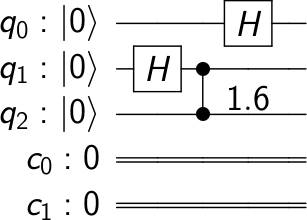

In [6]:
###
q = QuantumRegister(3, 'q')
c = ClassicalRegister(2, 'c')

# prepare the superposition in the ancilla:
circuit = QuantumCircuit(q, c)
circuit.h(q[0])
circuit.h(q[1])

#apply the C−U2^0 and  C−U2^1 controlled unitary operations:

# Controlled-C−U2^0
circuit.cu1(π / 2, q[1], q[2])
# Controlled-C−U2^1
# nothing: identity
###
amplitudes = get_amplitudes(circuit)
print(amplitudes)

circuit_drawer(circuit)

In [7]:
amplitudes = get_amplitudes(circuit)
assert np.allclose(amplitudes, np.array([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j]))

**Exercise 4** (1 point). Apply the same circuit to the other eigenvector. Place your solution in an object called `circuit_2`.

[0. +0.j  0. +0.j  0. +0.j  0. +0.j  0.5+0.j  0.5+0.j  0. +0.5j 0. +0.5j]


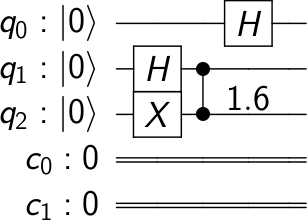

In [8]:
q = QuantumRegister(3, 'q')
c = ClassicalRegister(2, 'c')
###
circuit_2 = QuantumCircuit(q, c)
circuit_2.h(q[0])
circuit_2.h(q[1]);
circuit_2.x(q[2]); # create |1> in the main register

# Controlled-C−U2^0
circuit_2.cu1(π / 2, q[1], q[2])
#circuit_2.sdg(q[2])
# Controlled-C−U2^1
# nothing: identity

#circuit_2.swap(q[0], q[1])
#circuit_2.h(q[1])
#circuit_2.cu1(π / 2, q[0], q[1])
#circuit_2.h(q[0])
#circuit_2.swap(q[0], q[1])

amplitudes = get_amplitudes(circuit_2)
print(amplitudes)

circuit_drawer(circuit_2)

# apply quantum inverse Fourier transformation to write the phase to the ancilla register


In [9]:
amplitudes = get_amplitudes(circuit_2)
assert np.allclose(amplitudes, np.array([ 0. +0.j ,  0. +0.j ,  0. +0.j ,  0. +0.j ,  0.5+0.j , -0.5+0.j ,
                                          0. +0.5j,  0. -0.5j]))

AssertionError: 